In [2]:
# Improting liberaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Reading dataset
df = pd.read_csv('loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape # shape of dataset

(614, 13)

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.info() # Information of data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.describe() # Describing basics statistics.

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


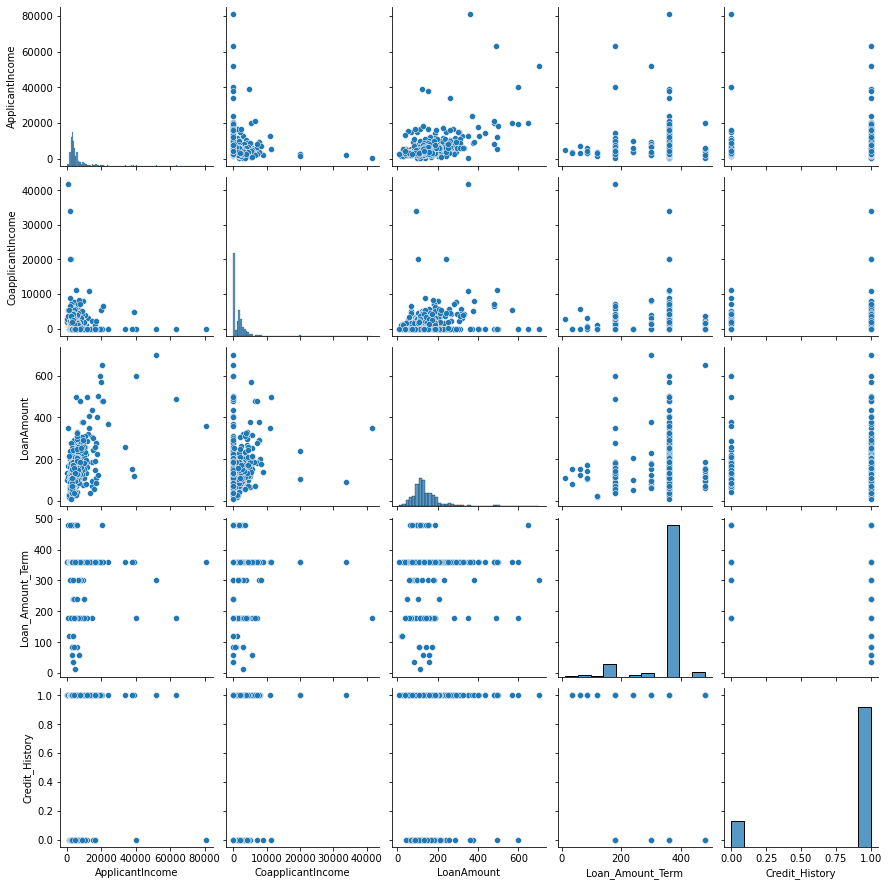

In [8]:
sns.pairplot(df) # Pairplot of dataset.

In [9]:
df.isnull().sum() # finding null values.

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df.dropna(how='any',inplace=True) # Dropping null values.

<AxesSubplot:>

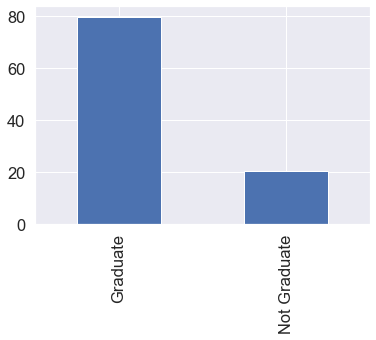

In [11]:
# Plotting barplot of Education.
sns.set_style('darkgrid')
sns.set(font_scale=1.5)
(df['Education'].value_counts()/len(df['Education'])*100).plot.bar()

Text(0.5, 1.0, 'Married')

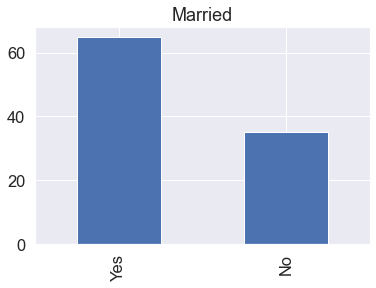

In [12]:
# Plotting barplot of Married.
(df['Married'].value_counts()/len(df['Married'])*100).plot.bar()
plt.title('Married')

<Figure size 360x360 with 0 Axes>

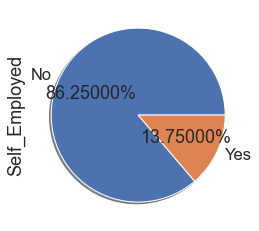

<Figure size 360x360 with 0 Axes>

In [13]:
# Plotting pie plot of Self Employed.
(df['Self_Employed'].value_counts()/len(df['Self_Employed'])*100).plot.pie(autopct='%.05f%%',shadow=True,
                                                                           labels=df['Self_Employed'].value_counts().index)
plt.figure(figsize=(5,5))

Text(0.5, 1.0, 'Property Area')

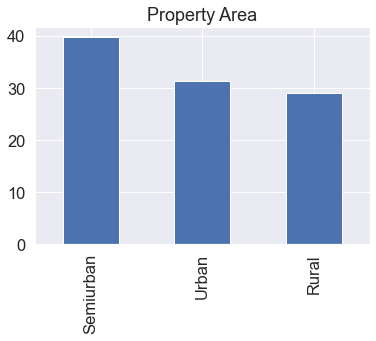

In [14]:
# Plotting barplot of Property Area.
(df['Property_Area'].value_counts()/len(df['Property_Area'])*100).plot.bar()
plt.title('Property Area')

<AxesSubplot:>

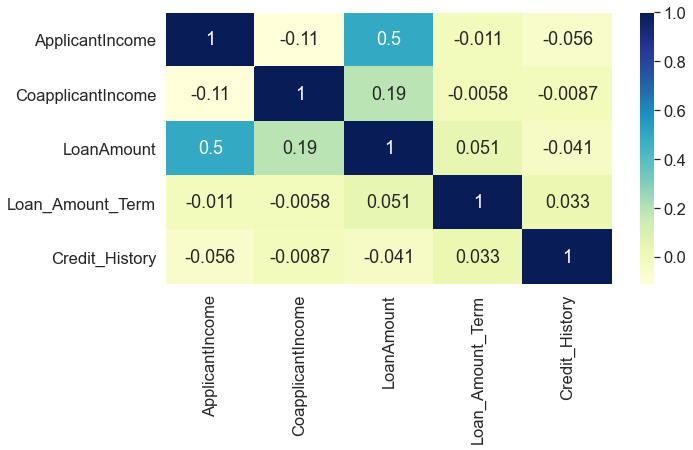

In [15]:
# Plotting heatmap for correlation.
plt.figure(figsize=(10,5))
corr = df.corr()
sns.heatmap(corr,annot = True,cmap='YlGnBu')

In [16]:
df=df.drop('Loan_ID',axis=1) # Dropping useless variable.

In [17]:
from sklearn.preprocessing import LabelEncoder # Importing Label Encoder.

In [18]:
encode=LabelEncoder()
df.Loan_Status = encode.fit_transform(df.Loan_Status) # encoding 'loan_Status'

In [19]:
#seperating dependent and independent variable
x = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

In [20]:
# Splitting the train and test data set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [21]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((384, 11), (96, 11), (384,), (96,))

In [22]:
# dummyfying dataset.
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)

In [23]:
x_train.shape,x_test.shape

((384, 20), (96, 20))

In [24]:
from sklearn.linear_model import LogisticRegression # importing Logistic Regression

In [25]:
lr = LogisticRegression()

In [26]:
lr.fit(x_train,y_train) # Fitting model

LogisticRegression()

In [27]:
y_pred = lr.predict(x_test) # predicting x test.

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_test,y_pred) # Score of model.

0.8020833333333334

In [30]:
# Importing Support Vector Machine
from sklearn.svm import SVC
model = SVC(kernel='linear') # For kernel type linear

In [31]:
model.fit(x_train,y_train) # fitting model.

SVC(kernel='linear')

In [36]:
model.score(x_test,y_test) # model score

0.8125